<center> <h2> Avaliação AB1 - Sistemas de controle 2 </h2> </center>

####Derek Nielsen Araújo Alves - 17212092
####Jadson César da Silva Santos - 18211019
####Matheus Ferreira Gêda - 18112339


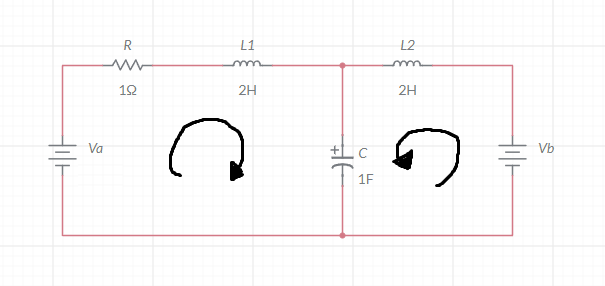

O circuito possui três elementos armazenadores de energia, da esquerda para direita, os indutores L1 e L2, e o Capacitor C.
Nesse exercicio iremos utilizar $Va$ como entrada, e desconsiderar $Vb$, visto que o circuito possui duas entradas.

Para o resistor: $V = Ri$

Para o indutor: $V = L\frac{di(t)}{dt} = L⋅\mathring{I}$

E que, para o capacitor: $V = \frac{1}{C}\int i(t)dt$

Primeiramente, iremos fazer a leitura da malha da esquerda:
\begin{align}
  Va = R ⋅ i_{L1}+L1⋅\mathring{i}_{L1}+Vc
\end{align}
Isolando $\mathring{i}_{L1}$:
\begin{align}
\mathring{i}_{L1}=\frac{1}{L1}(Va-R \cdot i_{L1}-Vc)
\end{align}

Agora, fazendo a leitura da malha direita, temos que:

\begin{align}
  0=L2⋅\mathring{i}_{L2}+Vc
\end{align}

Isolando $\mathring{i}_{L2}$:
\begin{align}
\mathring{I}_{L2}=-\frac{Vc}{L2}
\end{align}

Encontrando $\mathring{V}c$:

\begin{align}
Vc=\frac{1}{C}\int i(t)dt
\end{align}

Assim,
\begin{align}
\mathring{V}c=\frac{1}{C}\cdot i(t)
\end{align}

Como as correntes que passam pelo capacitor c são $iL1$ e $iL2$, então:

\begin{align}
\mathring{V}c=\frac{1}{C}\cdot (iL1 + iL2)
\end{align}


Portanto, iremos representar em espaço de estados o circuito acima:

\begin{align}
  \mathring{X} =
  \begin{bmatrix}
    \mathring{i}_{L1}\\
    \mathring{i}_{L2}\\
    \mathring{V}c
    \end{bmatrix}
\end{align}

\begin{align}
  x =
  \begin{bmatrix}
    i_{L1}\\
    i_{L2}\\
    Vc
    \end{bmatrix}
\end{align}

e que:
\begin{align}
  u =
  \begin{bmatrix}
    Va\\
    \end{bmatrix}
\end{align}

Portanto, como:

\begin{align}
\mathring{X} = Ax + Bu \\
Y = Cx + Du
\end{align}
e a saída é a queda de tensão $Vc$ no capacitor

Onde A, B, C, D são matrizes, temos que, para $R = 1 \Omega$, $L1, L2 = 2H$ e $C = 1F$;

A representação em espaço de estados é:

\begin{align}
  \begin{bmatrix}
      \mathring{I}_{L1}\\
      \mathring{I}_{L2}\\
      \mathring{V}c
  \end{bmatrix}
= 
\begin{bmatrix}
      -1/2 & 0 & -1/2 \\
      0 & 0 & -1/2 \\
      1 & 1 & 0
  \end{bmatrix} \cdot 
\begin{bmatrix}
    i_{L1}\\
    i_{L2}\\
    Vc
  \end{bmatrix}
+ \begin{bmatrix}
      1/2 \\
      0 \\
      0
    \end{bmatrix}
      \cdot
  \begin{bmatrix}
    Va\\
    \end{bmatrix}
\end{align}

\begin{align}
Y = \begin{bmatrix}
      0 & 0 & 1 
  \end{bmatrix}
\cdot
\begin{bmatrix}
    i_{L1}\\
    i_{L2}\\
    Vc
  \end{bmatrix}
\end{align}

In [ ]:
!pip install control

In [ ]:
import numpy as np
from scipy import signal
from scipy import linalg
from sympy import *
from control import matlab
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
import control
import warnings
warnings.filterwarnings("ignore")

####Espaço de Estados
#####Matrizes: A, B, C, D

In [ ]:
A = np.array([[-1/2, 0, -1/2], [0, 0, -1/2], [1, 1, 0]])
B = np.array([[1/2], [0], [0]])
C = np.array([0, 0, 1])
D = np.array([0])


####Respostas ao degrau, rampa e parábola

In [ ]:
def plot(t, y, tlt, lblx, lbly):
  fig = plt.figure(figsize = (10,4), facecolor="silver")
  plt.title(tlt)
  plt.plot(t, y)
  plt.grid()
  plt.xlabel(lblx)
  plt.ylabel(lbly)

Para a função degrau $r(t) = u(t)$, temos a respota:

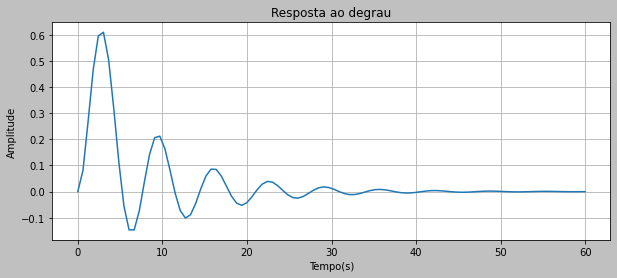

In [ ]:
lti = signal.lti(A, B, C, D)
t, y = signal.step(lti)

plot(t, y, "Resposta ao degrau", "Tempo(s)", "Amplitude")

Para a função rampa $r(t) = t \cdot u(t)$, temos a resposta:

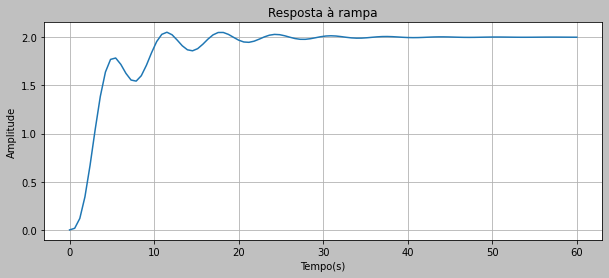

In [ ]:
t, y, x = signal.lsim(lti, t, np.linspace(0, 60, 100))
plot(t, y, "Resposta à rampa", "Tempo(s)", "Amplitude")

Para a função quadrática/parábola $r(t) = \frac{1}{2}t^2$, temos a resposta:

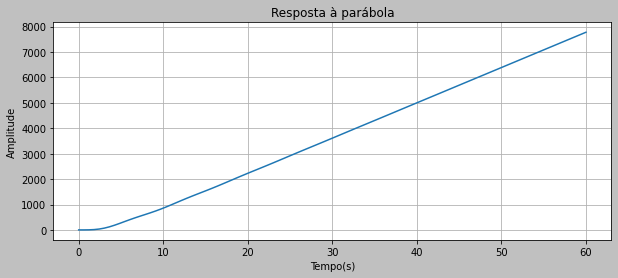

In [ ]:
p = t**2/2
t, y, x = signal.lsim(lti, p, np.linspace(0, 60, 100))
plot(t, y, "Resposta à parábola", "Tempo(s)", "Amplitude")

####Calculando a função de transferência equivalente a partir das matrizes, temos que:

In [ ]:
sys = signal.StateSpace(A, B, C, D)
Gs = sys.to_tf()
Tf = control.tf(Gs.num, Gs.den)
Tf

TransferFunction(array([ 5.00000000e-01, -4.71844785e-16]), array([1.  , 0.5 , 1.  , 0.25]))

Obs: na função, podemos ver que no numerador existe um valor muito pequeno próximo a 0, para os calculos de erro consideramos este valor como 0.


<h2> <center> Resposta e Análise do comportamento quanto ao grau e tipo </center> </h2>
<h3>Quanto ao grau:</h3>

Observamos que para o numerador o grau é 1, e que para o denoninador o grau é 3, sendo assim, como o grau do denominador é maior que o grau do numerador classificamos a função de transferência como **estritamente própria**.

<h3>Quanto ao tipo:</h3>

Precisamos calcular o erro em regime permanente nos três cenários de resposta, considerando:

\begin{equation} 
  G(s) = \frac{0.5s}{s^3 + 0.5s^2 + s + 0.25}
\end{equation}</br>

Para o degrau:

\begin{align} 
  e_{degrau} = \frac{1}{1+\lim_{s\to 0} G(s)} = \frac{1}{1} = 1
\end{align} 

Para a rampa:
\begin{align} 
  e_{rampa} = \frac{1}{\lim_{s\to 0} s \cdot G(s)} = ∄
\end{align}
pois:
\begin{align} 
  \lim_{s\to 0} s \cdot G(s) = 0
\end{align} 

Para a parábola:

\begin{align} 
  e_{parabola} = \frac{1}{\lim_{s\to 0} s^2 \cdot G(s)} = ∄,
\end{align} 
pois 
\begin{align} 
  \lim_{s\to 0} s^2 \cdot G(s) = 0
\end{align} 

Portanto, considerando os erros obtidos a função de transferência $G(s)$ é do **tipo 0**.



In [ ]:
control.step_info(Tf)

{'Overshoot': 8279762433344396.0,
 'Peak': 0.6188678599391142,
 'PeakTime': 2.8431628692098148,
 'RiseTime': 0.0,
 'SettlingMax': 0.21585377531273586,
 'SettlingMin': -0.15627050916273277,
 'SettlingTime': nan,
 'SteadyStateValue': -1.887379141862763e-15,
 'Undershoot': 3.278980074603971e+16}


####CONTROLABILIDADE E OBSERVABILIDADE

Calculando a matriz de controlabilidade:

In [ ]:
mc = matlab.ctrb(A, B)
print(mc)

[[ 0.5   -0.25  -0.125]
 [ 0.     0.    -0.25 ]
 [ 0.     0.5   -0.25 ]]


Calculando a matriz de observabilidade:

In [ ]:
mo = matlab.obsv(A, C)
print(mo)

[[ 0.   0.   1. ]
 [ 1.   1.   0. ]
 [-0.5  0.  -1. ]]


Calculando o posto das matrizes de controlabilidade e observabilidade para classificar o sistema

In [ ]:
print("Posto matriz controlabilidade:", matrix_rank(mc))
print("Posto matriz observabilidade:", matrix_rank(mo))

Posto matriz controlabilidade: 3
Posto matriz observabilidade: 3


<center> <h2> Controlabilidade

Como a matriz de controlabilidade possui posto completo igual a $3$, o sistema é, portanto, **controlável**</br></br>

<h2>Observabilidade

Como a matriz de observabilidade possui posto completo igual a $3$, o sistema é, portanto, **observável** </center>